In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D

In [35]:
plt.rcParams['figure.figsize']=(15,7)
%matplotlib inline

In [5]:
Data = sio.loadmat('moteData.mat')

In [6]:
Data.keys()

dict_keys(['__version__', 'X', '__header__', 'y', '__globals__'])

In [9]:
Data['X'].shape

(53, 2)

In [10]:
Data['y'].shape

(53, 1)

In [11]:
N = Data['X'].shape[0]

In [28]:
data_X = Data['X']
data_y= Data['y']

(53, 5)


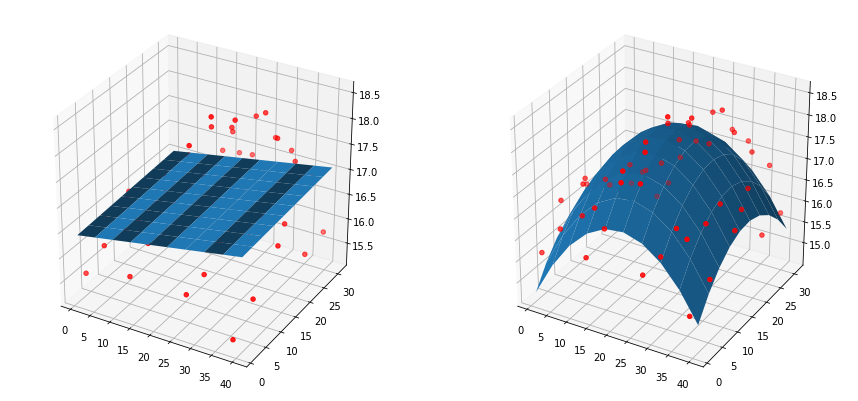

In [39]:
ones_array = np.ones((N,1))
fig = plt.figure(figsize=(15,7))
for useQuad in [0,1]:
    if useQuad==0:
        Phi = np.hstack((ones_array, data_X))
    else:
        Phi = np.hstack((ones_array,data_X,data_X**2))
        print(Phi.shape)
    
    persude_inv = np.linalg.inv(Phi.T.dot(Phi))
    w = reduce(np.dot, (persude_inv,Phi.T,data_y))
   
    ax = fig.add_subplot(1,2,useQuad+1, projection='3d')
    ax.scatter(data_X[:,0],data_X[:,1],data_y[:,0],color='red')
    x1 = np.linspace(np.min(data_X[:,0]),np.max(data_X[:,0]),10)
    x2 = np.linspace(np.min(data_X[:,1]),np.max(data_X[:,1]),10)
    [X,Y] = np.meshgrid(x1, x2)
    XY = np.dstack((X,Y)).reshape((-1,2))
    if useQuad:
        Z = w[0] + w[1]*XY[:,0]+ w[2]*XY[:,1] + w[3]*XY[:,0]**2 + w[4]*XY[:,1]**2
        Z_reshape = Z.reshape(X.shape)
    else:
        Z = w[0] + w[1]*XY[:,0]+ w[2]*XY[:,1]
        Z_reshape = Z.reshape(X.shape)
    ax.plot_surface(X,Y,Z_reshape)